In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_train=pd.read_csv("datasets_137197_325031_train_u6lujuX_CVtuZ9i.csv")
df_test=pd.read_csv("DATASET_LOAN_PREDICTION.csv")

# DATA EXPLORATION AND CLEANING

In [3]:
df_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


GENDER, DEPENDENTS, SELF_EMPLOYED, LOAN_AMOUNT, LOAN_AMOUNT_TERM, CREDIT_HISTORY are having missing data sets

In [5]:
ls_total = df_test.isnull().sum().sort_values(ascending=False)
ls_percent = (df_test.isnull().sum()/df_test.isnull().count()).sort_values(ascending=False)
df_missing_data = pd.concat([ls_total,ls_percent],axis=1, keys=["TOTAL","PERCENT"])
df_missing_data

,TOTAL,PERCENT
Credit_History,29,0.079019
Self_Employed,23,0.062670
Gender,11,0.029973
Dependents,10,0.027248
Loan_Amount_Term,6,0.016349
LoanAmount,5,0.013624
Property_Area,0,0.000000
CoapplicantIncome,0,0.000000
ApplicantIncome,0,0.000000
Education,0,0.000000


In [6]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Discarding or filling up the values of individual values in missing column.

In [7]:
df_train["Credit_History"] = df_train["Credit_History"].fillna(df_train['Credit_History'].dropna().mode().values[0])
df_train["Gender"] = df_train["Gender"].fillna(df_train['Gender'].dropna().mode().values[0])
df_train["Married"] = df_train["Married"].fillna(df_train['Married'].dropna().mode().values[0])
df_train["Self_Employed"] = df_train["Self_Employed"].fillna(df_train['Self_Employed'].dropna().mode().values[0])
df_train["Dependents"] = df_train["Dependents"].fillna(df_train['Dependents'].dropna().mode().values[0])
df_train["Loan_Amount_Term"] = df_train["Loan_Amount_Term"].fillna(df_train["Loan_Amount_Term"].dropna().mode().values[0])
df_train["LoanAmount"] = df_train["LoanAmount"].fillna(df_train["LoanAmount"].dropna().mode().values[0])

In [8]:
df_test.dropna(axis=0,how='any')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
361,LP002969,Male,Yes,1,Graduate,No,2269,2167,99.0,360.0,1.0,Semiurban
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


# DATA VISUALIZATION

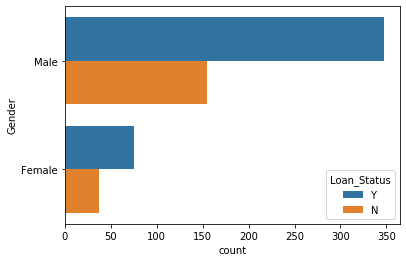

In [9]:
sns.countplot(y= 'Gender',hue = 'Loan_Status',data = df_train)

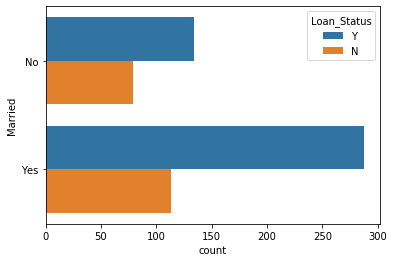

In [10]:
sns.countplot(y= 'Married',hue = 'Loan_Status',data = df_train)

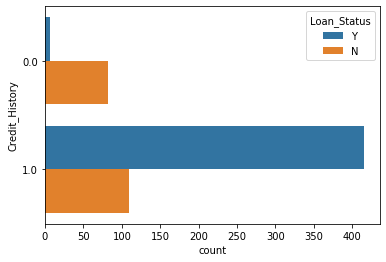

In [11]:
sns.countplot(y= 'Credit_History',hue = 'Loan_Status',data = df_train)

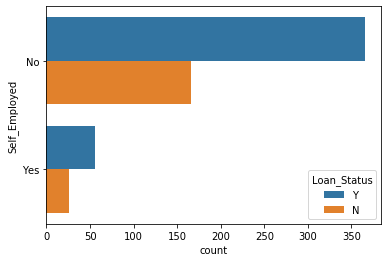

In [12]:
sns.countplot(y= "Self_Employed",hue = 'Loan_Status',data = df_train)

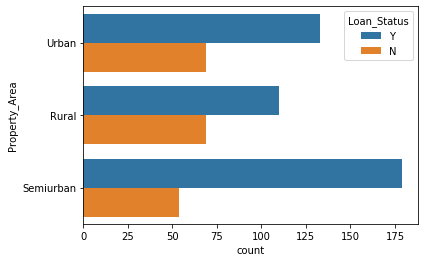

In [13]:
sns.countplot(y= "Property_Area",hue = 'Loan_Status',data = df_train)

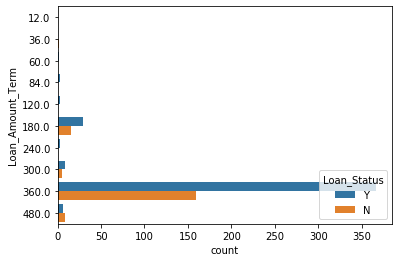

In [14]:
sns.countplot(y= "Loan_Amount_Term",hue = 'Loan_Status',data = df_train)

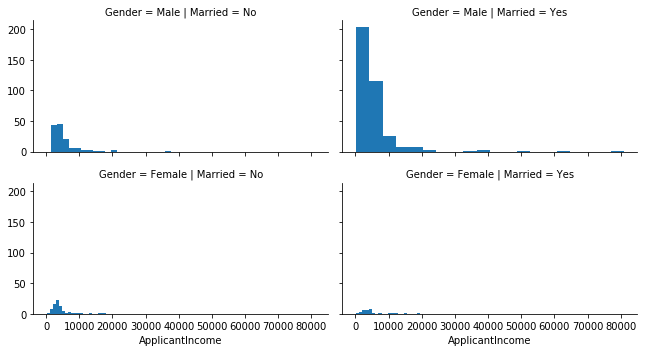

In [15]:
g = sns.FacetGrid(df_train,row="Gender",col="Married",size = 2.5 , aspect=1.8)
g.map(plt.hist,"ApplicantIncome", bins = 20)
g.add_legend()

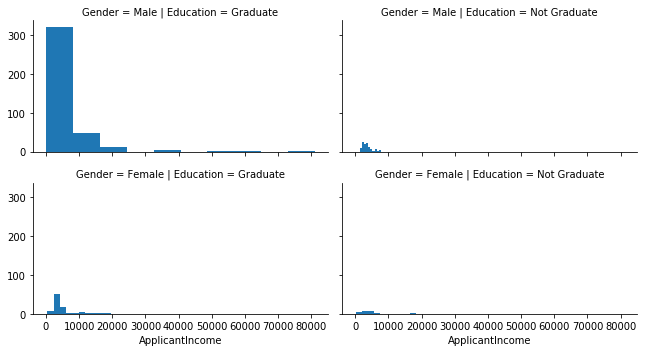

In [16]:
g = sns.FacetGrid(df_train,row="Gender",col="Education",size = 2.5 , aspect=1.8)
g.map(plt.hist,"ApplicantIncome", bins = 10)
g.add_legend()

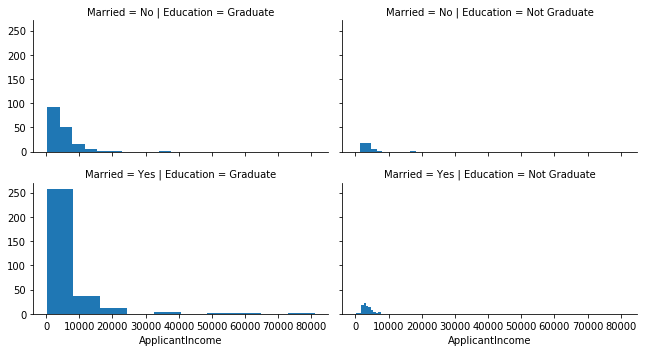

In [17]:
g = sns.FacetGrid(df_train,row="Married",col="Education",size = 2.5 , aspect=1.8)
g.map(plt.hist,"ApplicantIncome", bins = 10)
g.add_legend()

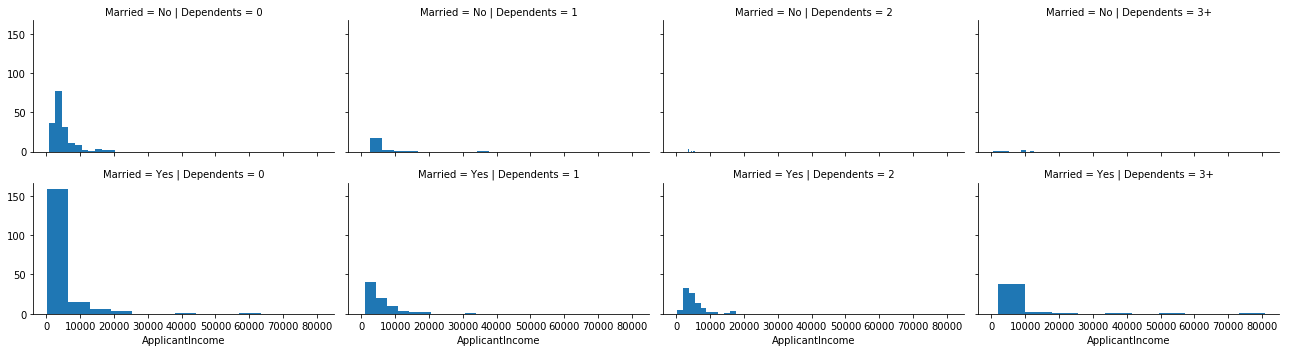

In [18]:
g = sns.FacetGrid(df_train,row="Married",col="Dependents",size = 2.5 , aspect=1.8)
g.map(plt.hist,"ApplicantIncome", bins = 10)
g.add_legend()

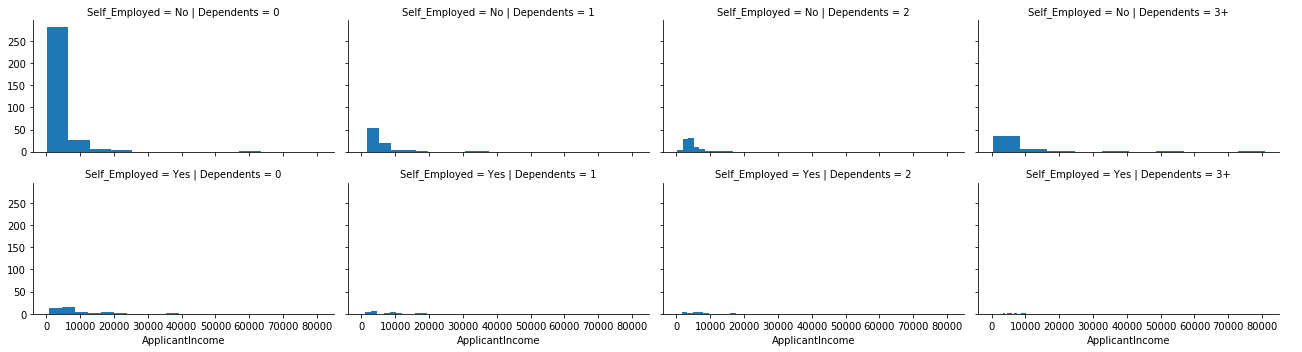

In [19]:
g = sns.FacetGrid(df_train,row="Self_Employed",col="Dependents",size = 2.5 , aspect=1.8)
g.map(plt.hist,"ApplicantIncome", bins = 10)
g.add_legend()

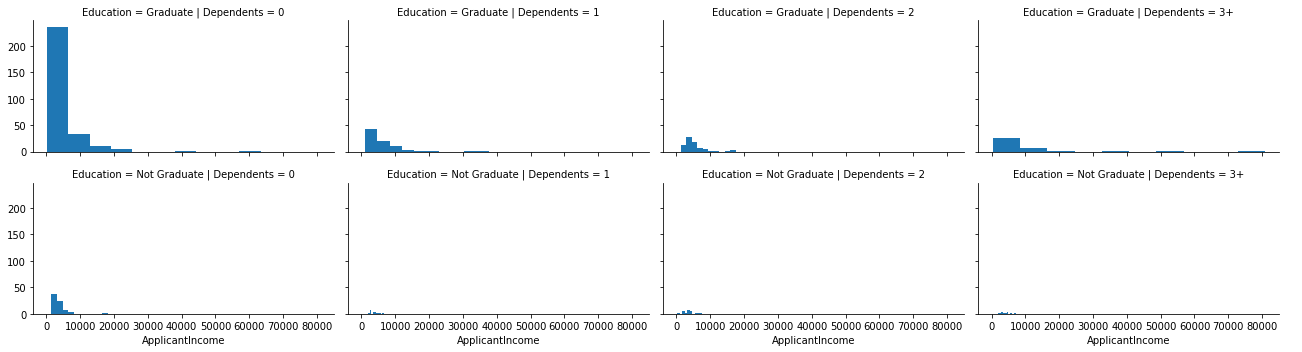

In [20]:
g = sns.FacetGrid(df_train,row="Education",col="Dependents",size = 2.5 , aspect=1.8)
g.map(plt.hist,"ApplicantIncome", bins = 10)
g.add_legend()

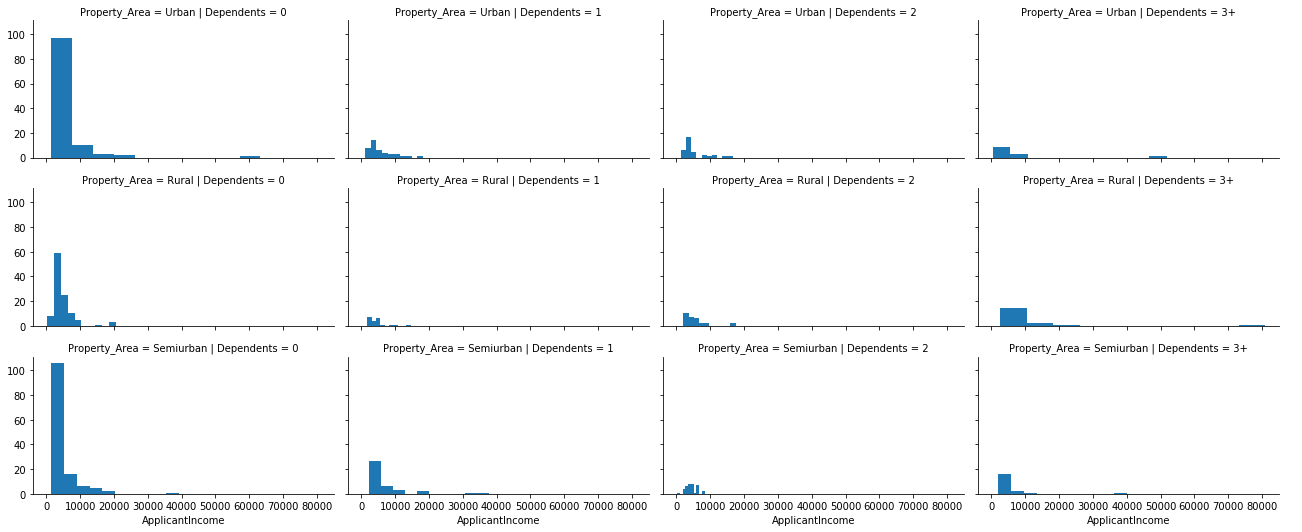

In [21]:
g = sns.FacetGrid(df_train,row="Property_Area",col="Dependents",size = 2.5 , aspect=1.8)
g.map(plt.hist,"ApplicantIncome", bins = 10)
g.add_legend()

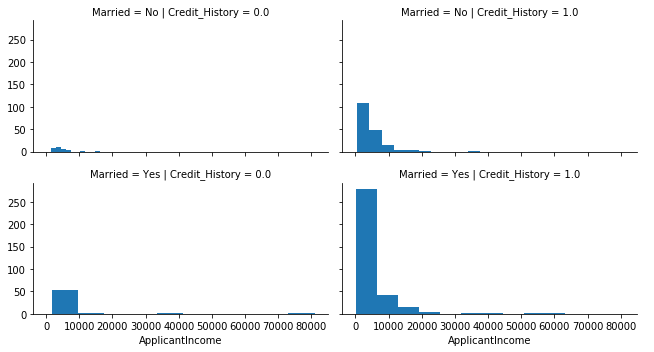

In [22]:
g = sns.FacetGrid(df_train,row="Married",col="Credit_History",size = 2.5 , aspect=1.8)
g.map(plt.hist,"ApplicantIncome", bins = 10)
g.add_legend()

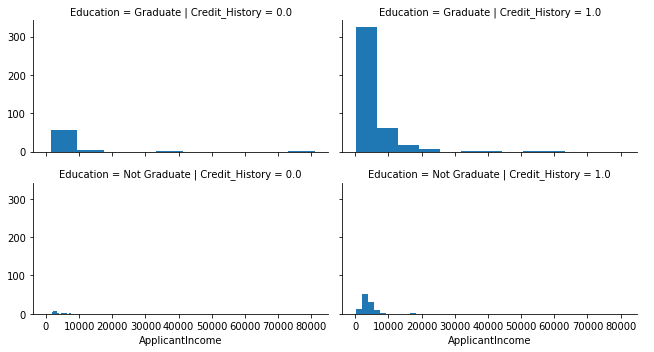

In [23]:
g = sns.FacetGrid(df_train,row="Education",col="Credit_History",size = 2.5 , aspect=1.8)
g.map(plt.hist,"ApplicantIncome", bins = 10)
g.add_legend()

# CONVERSION OF CATEGORICAL DATA TO NUMERIC TO FIT IN MODEL

In [24]:
# Creating Code Numeric to fit data frame
ruberic = {'Male': 1,'Female': 2,'Yes': 1,'No': 2,'Urban':3 ,'Rural': 1,'Semiurban':2,'Y':1,'N':0,'3+':3, 'Graduate':1,'Not Graduate':0}

In [25]:
df_train = df_train.applymap(lambda fac: ruberic.get(fac) if fac in ruberic else fac)
df_test = df_test.applymap(lambda fac: ruberic.get(fac) if fac in ruberic else fac)

In [26]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,2,0,1,2,5849,0.0,120.0,360.0,1.0,3,1
1,LP001003,1,1,1,1,2,4583,1508.0,128.0,360.0,1.0,1,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,3,1
3,LP001006,1,1,0,0,2,2583,2358.0,120.0,360.0,1.0,3,1
4,LP001008,1,2,0,1,2,6000,0.0,141.0,360.0,1.0,3,1


In [27]:
df_train.drop('Loan_ID',axis=1,inplace=True)
df_test.drop('Loan_ID',axis=1,inplace=True)
df_test.dropna(axis=0,how="any")

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,1,0,1,2.0,5720,0,110.0,360.0,1.0,3
1,1.0,1,1,1,2.0,3076,1500,126.0,360.0,1.0,3
2,1.0,1,2,1,2.0,5000,1800,208.0,360.0,1.0,3
4,1.0,2,0,0,2.0,3276,0,78.0,360.0,1.0,3
5,1.0,1,0,0,1.0,2165,3422,152.0,360.0,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...
361,1.0,1,1,1,2.0,2269,2167,99.0,360.0,1.0,2
362,1.0,1,3,0,1.0,4009,1777,113.0,360.0,1.0,3
363,1.0,1,0,1,2.0,4158,709,115.0,360.0,1.0,3
365,1.0,1,0,1,2.0,5000,2393,158.0,360.0,1.0,1


In [46]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             356 non-null    float64
 1   Married            367 non-null    float64
 2   Education          367 non-null    float64
 3   Self_Employed      344 non-null    float64
 4   ApplicantIncome    367 non-null    float64
 5   CoapplicantIncome  367 non-null    float64
 6   LoanAmount         362 non-null    float64
 7   Loan_Amount_Term   361 non-null    float64
 8   Credit_History     338 non-null    float64
 9   Property_Area      367 non-null    float64
 10  Dependents         614 non-null    int64  
dtypes: float64(10), int64(1)
memory usage: 52.9 KB


In [29]:
Dependents_num = pd.to_numeric(df_train['Dependents'])
df_train.drop(["Dependents"],axis=1,inplace=True)
df_train = pd.concat([df_train,Dependents_num],axis=1)
df_test.drop(["Dependents"],axis=1,inplace=True)
df_test = pd.concat([df_test,Dependents_num],axis=1)

In [30]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Education          614 non-null    int64  
 3   Self_Employed      614 non-null    int64  
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         614 non-null    float64
 7   Loan_Amount_Term   614 non-null    float64
 8   Credit_History     614 non-null    float64
 9   Property_Area      614 non-null    int64  
 10  Loan_Status        614 non-null    int64  
 11  Dependents         614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB


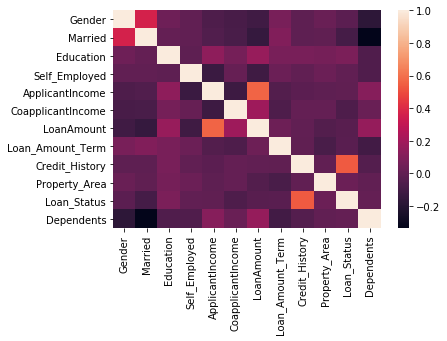

In [31]:
sns.heatmap(df_train.corr())

In [32]:
X = df_train.drop('Loan_Status',axis=1)
y = df_train["Loan_Status"]
X_test_new = df_test


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 

In [35]:
from sklearn.metrics import f1_score

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

In [37]:
model = LogisticRegression()
model.fit(X_train,y_train)
ymod = model.predict(X_test)
ymod

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [38]:
model_eval = f1_score(y_test,ymod)
model_eval

0.8949152542372881

In [39]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [40]:
ytree = tree.predict(X_test)
ytree

array([0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [41]:
tree_eval = f1_score(y_test,ytree)
tree_eval

0.7984790874524715

In [42]:
forest = RandomForestClassifier()
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [43]:
yforest = forest.predict(X_test)
yforest

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [44]:
forest_eval = f1_score(y_test,yforest)
forest_eval

0.8641114982578397

In [45]:
ymod1 = model.predict(X_test_new)
ymod

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').